In [1]:
from numpy import *
#これ以降この形でimportするので"np."を省略できる
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

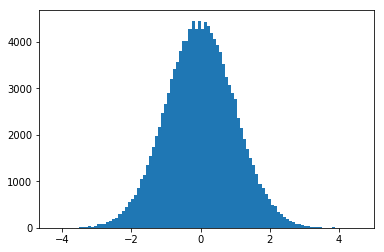

In [2]:
#棄却法による正規分布の生成
u = random.rand(1000000)
v = (random.rand(1000000)-0.5)*20
y = norm.pdf(v)
x = where(u*0.4 < y)
x = v[x]

plt.hist(x, bins=100)
plt.show()

In [3]:
#効率が悪い
print(x.shape[0]/1000000)
#uとvふたつ生成して1つしか生成できてないので、実際には↓のさらに半分

0.125851


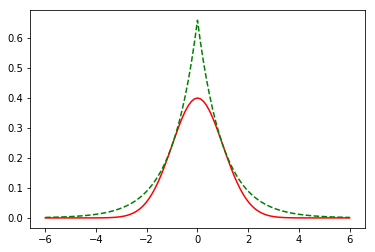

In [4]:
# 効率を上げる　with ラプラス分布
# ch(x)とg(x)のグラフを描く
x = linspace(-6, 6, 101)
h = exp(-abs(x))/2
g = norm.pdf(x)
c = sqrt(2*e/pi)
ch = c*h
plt.plot(x, g, 'r')
plt.plot(x, ch, '--g')
plt.show()
g_ch=exp(-(abs(x)-1)**2/2)

棄却法のイメージは、"refine"し"redefine"すること。Vはラプラス分布に従っている、つまりVの現れる確率はhに依っているので、ただVを出すのではなく、
```
put V only if g(V)/ch(V) < U
```
とすることでVをrefineする（磨く・形を変える）。

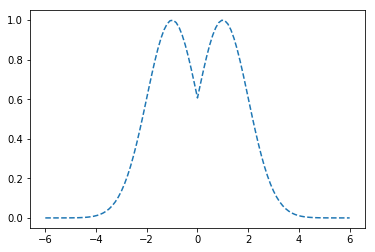

In [5]:
#g/chのグラフも描いてみる
g_ch = exp(-(abs(x)-1)**2/2)
plt.plot(x, g_ch, '--')
plt.show()
#hのうちgがどれほどを占めているかを表す。上のグラフと見比べよ

0.760262


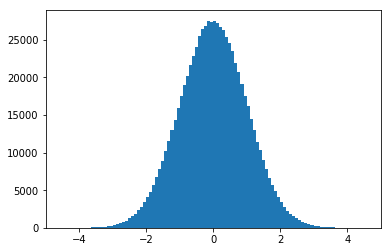

In [6]:
# 実際に棄却法を実装。
# ラプラス分布の生成は、逆関数法で簡単に行える
# 累積分布関数を丁寧に場合分けすると、U~Uniform(0,1)に対して
# ±log(U)をそれぞれ50％の確率で出力すればいいとわかる
u1 = 2*random.rand(1000000)-1  # u1~Uniform(-1,1)
s = sign(u1)
v = -s*log(random.rand(1000000))

u = abs(u1)#u~Uniform(0,1)
#分かりにくいが、vとu1は完全に独立なのでu1を再利用するのはOK
y=exp(-(abs(v)-1)**2/2)
a=where(u<=y,1,0)
x = v[a==1]
print(x.shape[0]/1000000)

#xが正規分布に従っていることを確かめる
plt.hist(x,bins=100)
plt.show()

(1000000, 2)


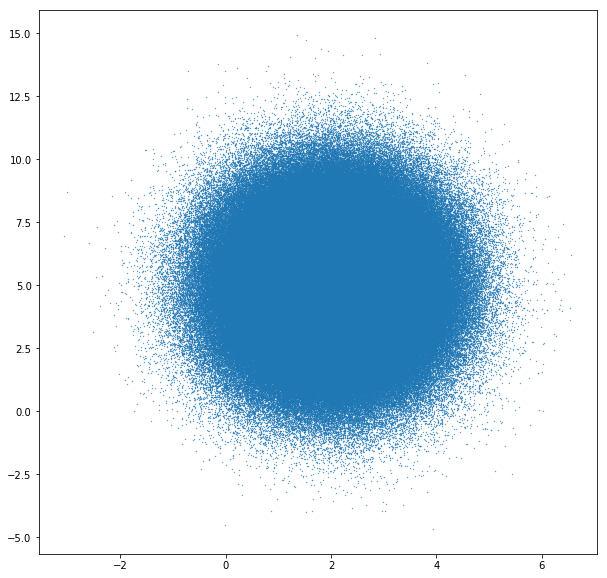

In [7]:
# 多次元正規分布もnumpyで生成できる
sigma = array([1, 2])
mu = array([2, 5])
# 各成分が独立な場合なので成分ごとの生成で良い
z = random.randn(1000000, 2)
x = sigma*z+mu
print(x.shape)
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], s=0.1)
plt.show()


In [8]:
print(mean(x,axis=0))#平均の確認
print(cov(x.T))#分散共分散行列の確認、仕様上xを転置しないと使えない

[2.00000023 4.99740037]
[[1.00010727e+00 2.47190047e-03]
 [2.47190047e-03 3.99761732e+00]]


[[1.  1.6]
 [1.6 4. ]]


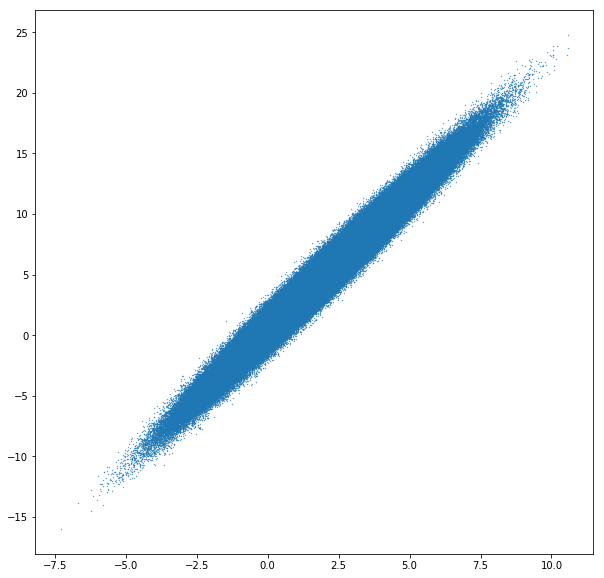

[[1.  0. ]
 [1.6 1.2]]
[[1.  1.6]
 [1.6 4. ]]


In [9]:
#多変量正規分布・非独立の場合
rho = 0.8
sigma = array([1, 2])
mu = array([2, 5])
Sigma = array([[sigma[0]**2, sigma[0]*sigma[1]*rho],
                  [sigma[0]*sigma[1]*rho, sigma[1]**2]])
print(Sigma)
z = random.randn(1000000, 2)
x= dot(z, Sigma)+mu
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], s=0.1)
plt.show()
A=linalg.cholesky(Sigma)#コレスキー分解：行列の平方根に相当
print(A)
print(dot(A,A.T))#Sigmaに戻っていることを確かめる

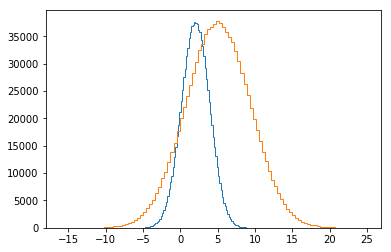

In [10]:
plt.hist(x[:,0],histtype='step',bins=100)
plt.hist(x[:,1],histtype='step',bins=100)
plt.show()

実際、線形変換を何度繰り返そうとも、正規分布は保存されることが証明されている

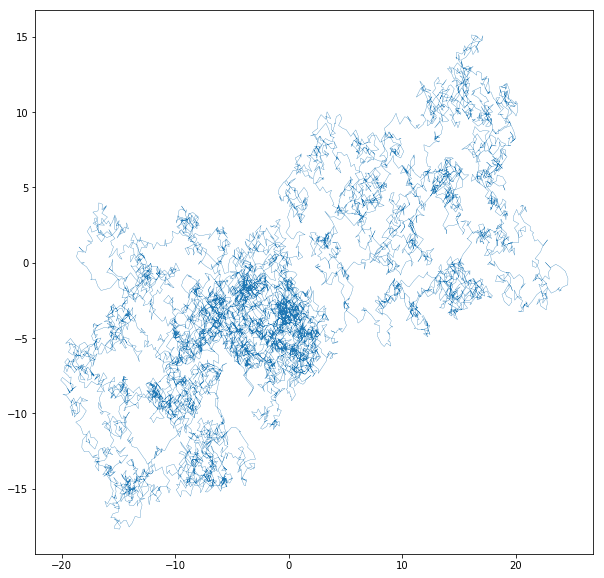

In [11]:
#ランダムウォーク
#Nを増減させてみよう
N=10000
e=random.rand(N,2)-0.5
Sum=cumsum(e,axis=0)
x=zeros((N,2))
x=x+Sum
plt.figure(figsize=(10,10))
plt.plot(x[:,0],x[:,1],linewidth=0.3)
plt.show()

[[ 2.77777778 -1.11111111]
 [-1.11111111  0.69444444]]


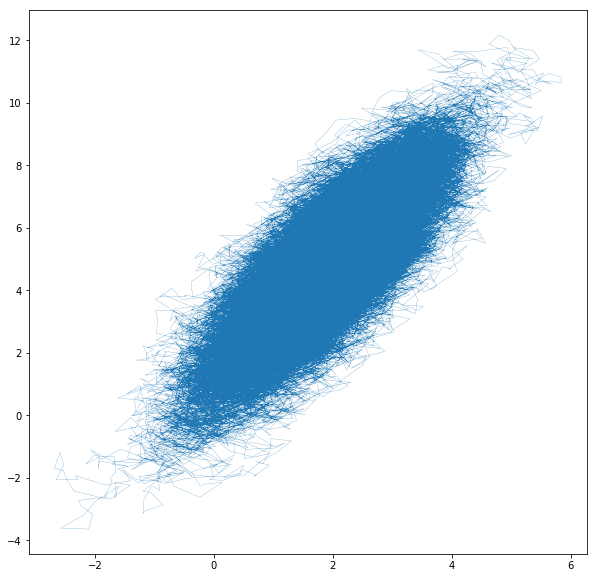

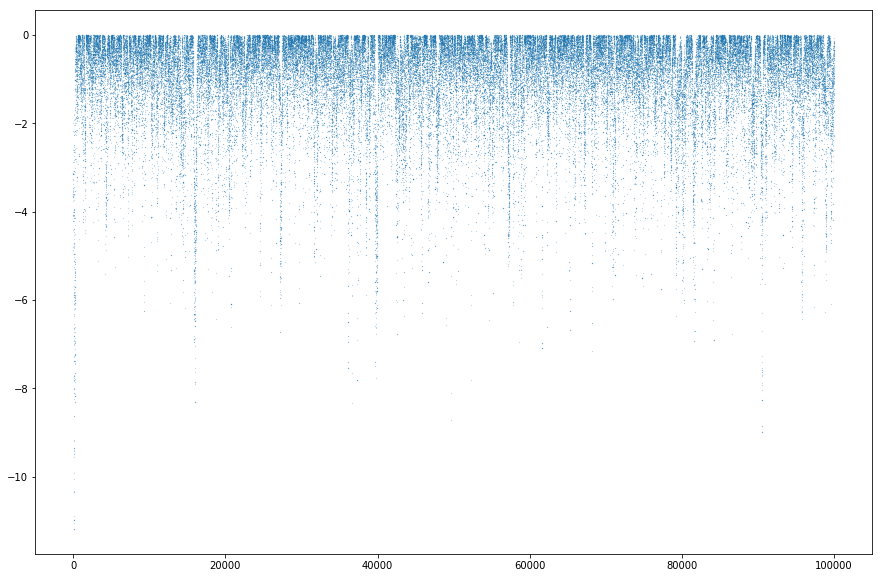

In [12]:
# 正規分布に従って移動(MCMC)
N = 100000

rho = 0.8
sigma = array([1, 2])
mu = array([2, 5])
Sigma = array([[sigma[0]**2, sigma[0]*sigma[1]*rho],
               [sigma[0]*sigma[1]*rho, sigma[1]**2]])
x = zeros((N, 2))
ff = empty(N-1)#尤度を格納する変数

Sinv=linalg.inv(Sigma)
print(Sinv)
def myf(x): return exp(-0.5*dot(dot((x-mu).T, Sinv), (x-mu)))#密度関数

for i in range(N-1):
    v = x[i]+random.rand(2)-0.5
    gx = myf(x[i])
    gv = myf(v)
    ff[i] = gx
    a = min(1, gv/gx)
    if(random.rand(1)[0] <= a):
        x[i+1] = v
    else:
        x[i+1] = x[i]

plt.figure(figsize=(10,10))
plt.plot(x[:, 0], x[:, 1], linewidth=0.2)
plt.show()
plt.figure(figsize=(15,10))
plt.plot(log(ff), '.', markersize=0.2)
plt.show()